Hypothesis: Higher temperature anomalies are more common in the U.S. now than in the 20th century, before the effects of widespread industrialization on the climate began.

In [1]:
# packages for making the maps
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd

# packages for creating and displaying the .gif
import imageio
#import visvis as vv


In [2]:
fp = './data/GIS.OFFICIAL_CLIM_DIVISIONS.shp'
map_df = gpd.read_file(fp)
map_df.head()

,OBJECTID,STATE,STATE_FIPS,CD_2DIG,STATE_CODE,CLIMDIV,CD_NEW,FIPS_CD,NCDC_GEO_I,NAME,ST_ABBRV,SHAPE_AREA,SHAPE_LEN,geometry
0,91,New Mexico,35,05,29,2905,5,3505,1.0,CENTRAL VALLEY,NM,0.0,0.0,"POLYGON ((-105.87800 33.24400, -105.98500 33.2..."
1,92,New Mexico,35,06,29,2906,6,3506,2.0,CENTRAL HIGHLANDS,NM,0.0,0.0,"POLYGON ((-105.14900 32.64000, -105.22300 32.5..."
2,93,Idaho,16,01,10,1001,1,1601,3.0,PANHANDLE,ID,0.0,0.0,"POLYGON ((-116.04882 47.97673, -116.11800 48.0..."
3,94,Idaho,16,02,10,1002,2,1602,4.0,NORTH CENTRAL PRAIRIES,ID,0.0,0.0,"POLYGON ((-116.15700 45.71800, -116.26300 45.8..."
4,96,Idaho,16,04,10,1004,4,1604,6.0,CENTRAL MOUNTAINS,ID,0.0,0.0,"POLYGON ((-113.83465 45.52065, -113.88700 45.5..."


In [3]:
'''
# set the filepath and load in a shapefile of NOAA climate divisions
fp = "C:\\Users\\Brian\\Desktop\\COS 497 - GIS\\US Climate Metrics\\climate_div.shp"
map_df = gpd.read_file(fp)
# check data type so we can see that this is not a normal dataframe, but a GEOdataframe
map_df.head()
'''

'\n# set the filepath and load in a shapefile of NOAA climate divisions\nfp = "C:\\Users\\Brian\\Desktop\\COS 497 - GIS\\US Climate Metrics\\climate_div.shp"\nmap_df = gpd.read_file(fp)\n# check data type so we can see that this is not a normal dataframe, but a GEOdataframe\nmap_df.head()\n'

<Axes: >

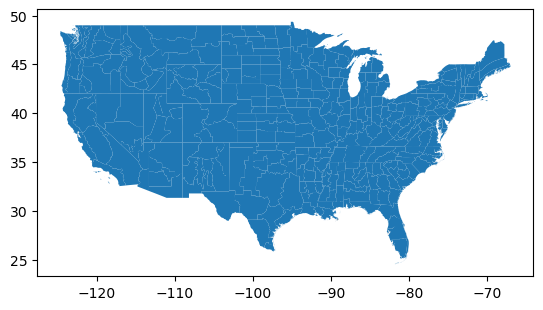

In [4]:
map_df.plot()

In [6]:
# load in data files from the NOAA to populate the map
df_1895 = pd.read_csv("./data/110-tavg-189606-12.csv", header=0, skiprows=4,on_bad_lines='warn')
df_1960 = pd.read_csv("./data/110-tavg-196006-12.csv", header=0, skiprows=4,on_bad_lines='warn')
df_2010 = pd.read_csv("./data/110-tavg-201006-12.csv", header=0, skiprows=4,on_bad_lines='warn')
df_2019 = pd.read_csv("./data/110-tavg-201906-12.csv", header=0, skiprows=4,on_bad_lines='warn')

/var/folders/00/m_p76xcd75jg4kx7_wyjwd500000gn/T/ipykernel_52070/3444597767.py:2: ParserWarning: Skipping line 344: expected 7 fields, saw 8

  df_1895 = pd.read_csv("./data/110-tavg-189606-12.csv", header=0, skiprows=4,on_bad_lines='warn')
/var/folders/00/m_p76xcd75jg4kx7_wyjwd500000gn/T/ipykernel_52070/3444597767.py:3: ParserWarning: Skipping line 344: expected 7 fields, saw 8

  df_1960 = pd.read_csv("./data/110-tavg-196006-12.csv", header=0, skiprows=4,on_bad_lines='warn')
/var/folders/00/m_p76xcd75jg4kx7_wyjwd500000gn/T/ipykernel_52070/3444597767.py:4: ParserWarning: Skipping line 344: expected 7 fields, saw 8

  df_2010 = pd.read_csv("./data/110-tavg-201006-12.csv", header=0, skiprows=4,on_bad_lines='warn')
/var/folders/00/m_p76xcd75jg4kx7_wyjwd500000gn/T/ipykernel_52070/3444597767.py:5: ParserWarning: Skipping line 344: expected 7 fields, saw 8

  df_2019 = pd.read_csv("./data/110-tavg-201906-12.csv", header=0, skiprows=4,on_bad_lines='warn')


In [7]:
df_1895.head()

,ID,Name,State,Value,Anomaly (1901-2000 base period),Rank,1901-2000 Mean
0,101,Northern Valley,Alabama,60.2,0.2,65,59.9
1,102,Appalachian Mountain,Alabama,60.4,0.1,59,60.3
2,103,Upper Plains,Alabama,62.5,0.2,72,62.3
3,104,Eastern Valley,Alabama,61.3,-0.0,52,61.3
4,105,Piedmont Plateau,Alabama,62.0,0.2,71,61.8


In [8]:
# select only the columns that we want for the map
all_years_df = pd.concat([df_1895['ID'],
                          df_1895['Anomaly (1901-2000 base period)'],
                          df_1960['Anomaly (1901-2000 base period)'],
                          df_2010['Anomaly (1901-2000 base period)'],
                          df_2019['Anomaly (1901-2000 base period)']],
                         axis=1)
    
# rename the columns
all_years_df.columns = ['ID',
                        '1895 Average Annual Temperature Anomaly (°F)',
                        '1960 Average Annual Temperature Anomaly (°F)',
                        '2010 Average Annual Temperature Anomaly (°F)',
                        '2019 Average Annual Temperature Anomaly (°F)']

all_years_df.head()

,ID,1895 Average Annual Temperature Anomaly (°F),1960 Average Annual Temperature Anomaly (°F),2010 Average Annual Temperature Anomaly (°F),2019 Average Annual Temperature Anomaly (°F)
0,101,0.2,-1.4,-1.1,1.8
1,102,0.1,-1.2,-1.0,1.9
2,103,0.2,-1.4,-1.3,1.6
3,104,-0.0,-1.0,-1.1,2.1
4,105,0.2,-0.9,-1.1,2.0


In [9]:
# join the GEOdataframe with the cleaned up csv data
merged = map_df.set_index('CLIMDIV').join(all_years_df.set_index('ID'))

merged.sort_values('CLIMDIV', ascending=False).head()

,OBJECTID,STATE,STATE_FIPS,CD_2DIG,STATE_CODE,CD_NEW,FIPS_CD,NCDC_GEO_I,NAME,ST_ABBRV,SHAPE_AREA,SHAPE_LEN,geometry,1895 Average Annual Temperature Anomaly (°F),1960 Average Annual Temperature Anomaly (°F),2010 Average Annual Temperature Anomaly (°F),2019 Average Annual Temperature Anomaly (°F)
CLIMDIV,,,,,,,,,,,,,,,,,
4810,66,Wyoming,56,10,48,10,5610,320.0,UPPER PLATTE,WY,0.0,0.0,"POLYGON ((-107.33378 42.80068, -107.32835 42.7...",-2.1,0.1,-0.5,0.5
4809,68,Wyoming,56,09,48,9,5609,322.0,WIND RIVER,WY,0.0,0.0,"POLYGON ((-109.51581 43.93993, -109.50484 43.9...",-1.0,-0.1,-0.7,-0.1
4808,67,Wyoming,56,08,48,8,5608,321.0,LOWER PLATTE,WY,0.0,0.0,"POLYGON ((-106.52965 43.18177, -106.52644 43.1...",-0.9,-0.3,-0.6,-0.0
4807,64,Wyoming,56,07,48,7,5607,318.0,CHEYENNE & NIOBRARA DRAINAGE,WY,0.0,0.0,"POLYGON ((-104.28338 44.15419, -104.27634 44.1...",-1.5,-0.5,-0.7,-1.5
4806,63,Wyoming,56,06,48,6,5606,317.0,BELLE FOURCHE DRAINAGE,WY,0.0,0.0,"POLYGON ((-104.19334 44.99802, -104.17200 44.9...",-1.0,-0.6,-0.4,-1.7


In [10]:
# save all the maps in the charts folder
output_path = './images/'

# counter for the for loop
i = 0

# list of years (which are the column names at the moment)
list_of_years = ['1895', '1960', '2010', '2019']

/var/folders/00/m_p76xcd75jg4kx7_wyjwd500000gn/T/ipykernel_52070/1214967488.py:44: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  map_images.append(imageio.imread(filepath))  # adds the map to an array as one frame of the animated .gif
/var/folders/00/m_p76xcd75jg4kx7_wyjwd500000gn/T/ipykernel_52070/1214967488.py:44: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  map_images.append(imageio.imread(filepath))  # adds the map to an array as one frame of the animated .gif
/var/folders/00/m_p76xcd75jg4kx7_wyjwd500000gn/T/ipykernel_52070/1214967488.py:44: DeprecationWarning: Starting with Ima

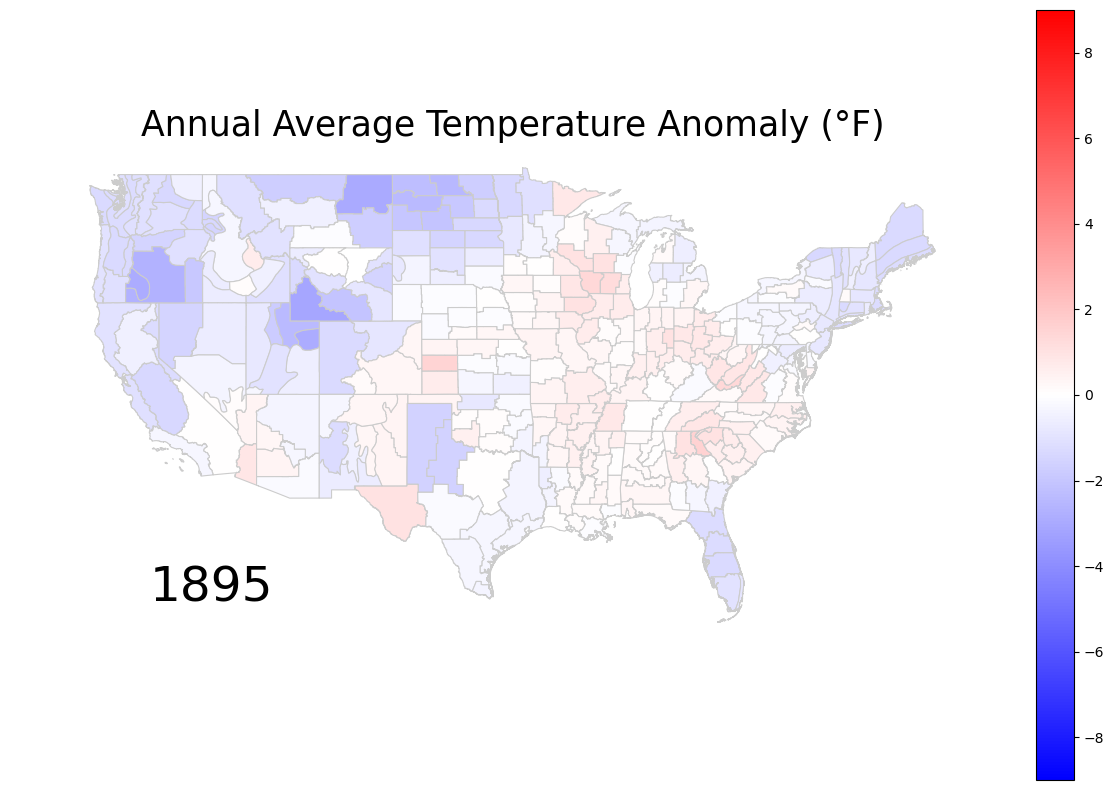

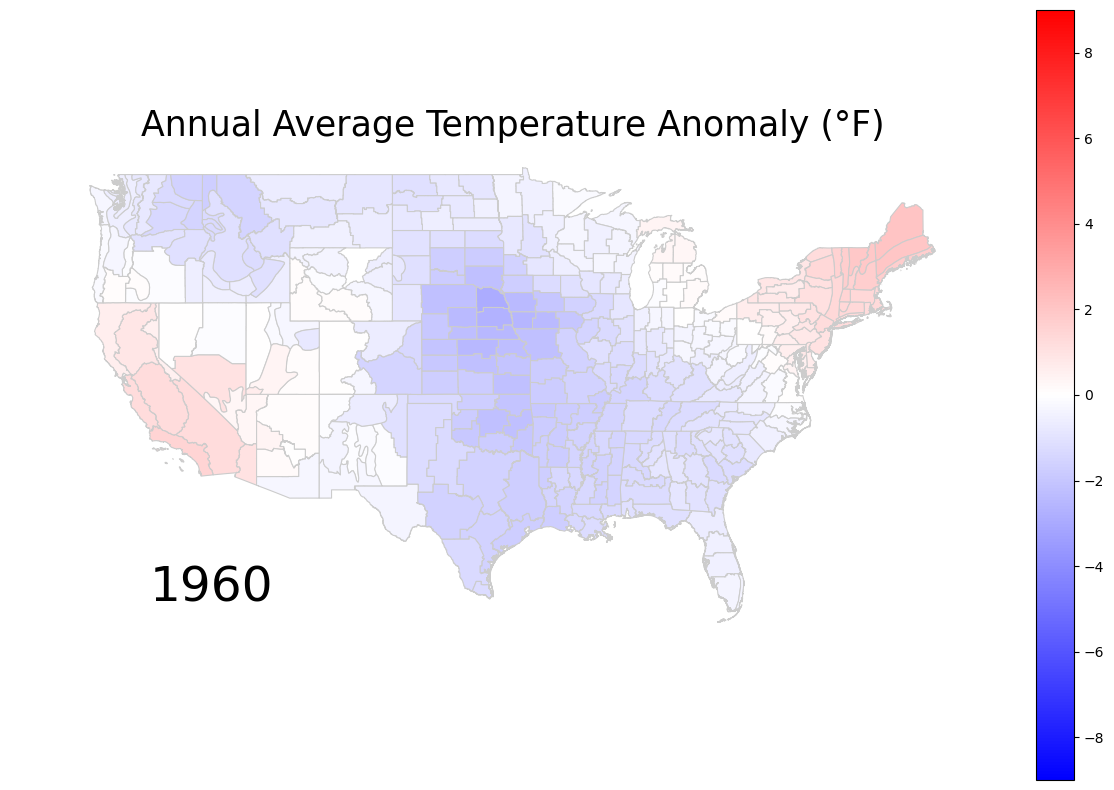

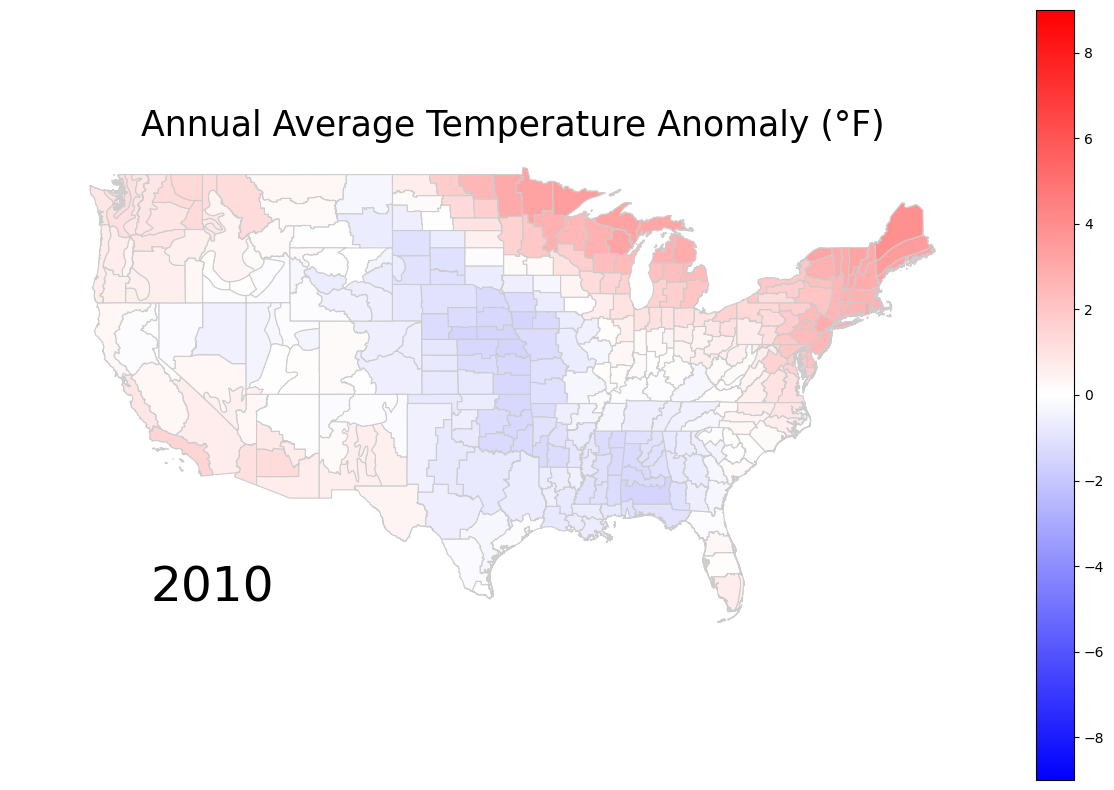

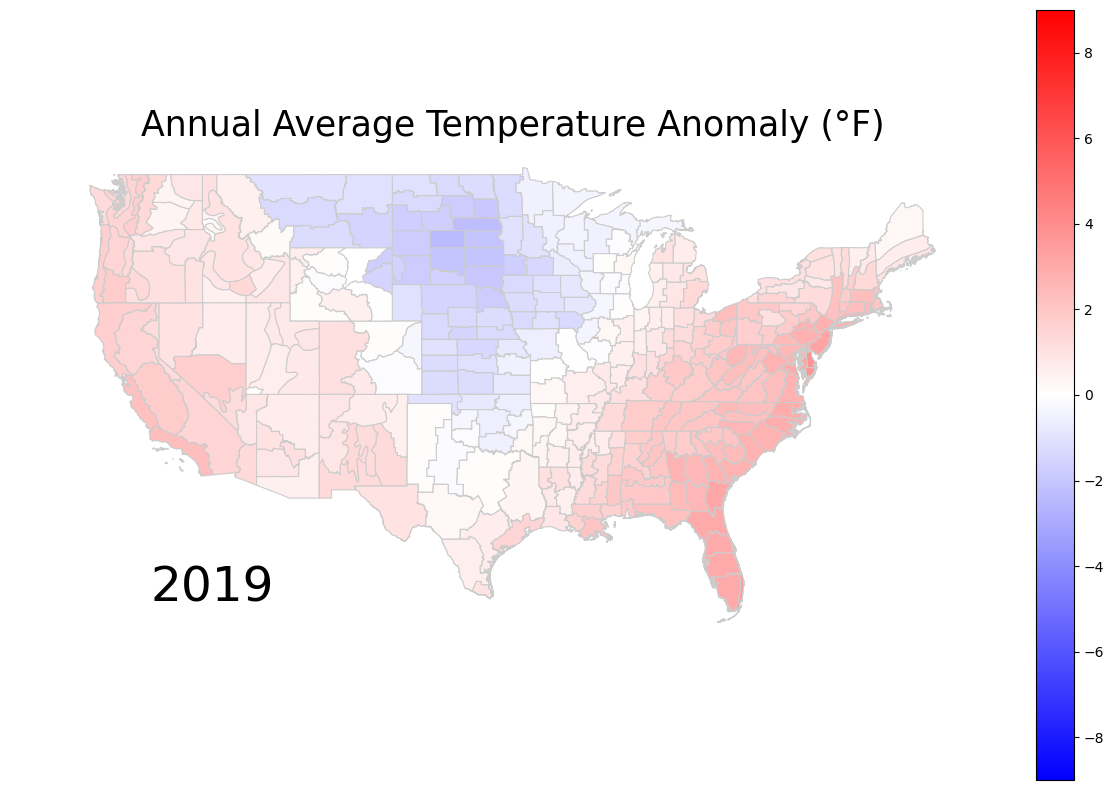

In [11]:


# create one map per year
map_images = []

# set the range for the choropleth scale
vmin, vmax = -9, 9   # range for the choropleth color scale


for year in list_of_years:
    
    fig = merged.plot(column=year + ' Average Annual Temperature Anomaly (°F)',
                      cmap='bwr',
                      figsize=(15, 10),
                      linewidth=0.8,
                      edgecolor='0.8',
                      vmin=vmin,
                      vmax=vmax,
                      legend=True,
                      norm=plt.Normalize(vmin=vmin, vmax=vmax)) # plt.Normalize keeps the legend range the same for all maps
    
    # remove axis of chart
    fig.axis('off')
    
    # add a title
    fig.set_title('Annual Average Temperature Anomaly (°F)', \
            fontdict={'fontsize': '25',
                         'fontweight' : '3'})
    
    # position an annotation to the bottom left
    fig.annotate(year,
            xy=(0.1, .225), xycoords='figure fraction',
            horizontalalignment='left', verticalalignment='top',
            fontsize=35)

    # create an annotation for the  data source
#     ax.annotate('Source: NOAA',
#                xy=(0.1, .08), xycoords='figure fraction',
#                horizontalalignment='left', verticalalignment='top',
#                fontsize=10, color='#555555')
    
    # save the figure as a jpg in the output path
    filepath = os.path.join(output_path, year + '_annual_avg_temp.jpg')
    chart = fig.get_figure()
    chart.savefig(filepath, dpi=75)
    map_images.append(imageio.imread(filepath))  # adds the map to an array as one frame of the animated .gif

In [13]:
# combines the images into an animated .gif
from IPython.display import display, HTML

imageio.mimwrite('./images/animated_map.gif', map_images, duration=0.9)


HTML('''<div style="display: flex; justify-content: row;">
    <img src="https://raw.githubusercontent.com/BrianTibbetts/US-Climate-Time-Series/main/animated_map.gif">
</div>''')

Some important observations from this map include:

-The increase in red sections up until 2019 point toward a general trend of warming.

-Temperature anomalies close to 0 seem more common in 1895 and 1960 than in 2019.

-2010 seems extraordinarily warm. It's the closest year to the top of the scale and helps to show the trend of accelerated climate change since 1960.

-Coastal climate zones nearly all experienced positive temperature anomalies in 2019.

In [14]:
# analyze the 2019 annual average temperatures using data from 1901-2000 as a point of comparison
from math import sqrt

# calculate the z-score for 2019
mean_temp_2019 = df_2019['Value'].mean()                  # sample mean
mean_temp_20th_century = df_2019['1901-2000 Mean'].mean() # population mean
st_dev_20th_century = df_2019['1901-2000 Mean'].std()     # population standard deviation
sample_size = df_2019['Value'].count()                    # sample size

z_score = ( mean_temp_2019 -  mean_temp_20th_century ) / ( st_dev_20th_century / sqrt(sample_size) )
print(z_score)

1.7627351814324967


In [15]:
# test whether the z-score shows statistical significance
import scipy.stats as st

alpha = 0.05                       # P-values lower than 0.05 show that there is only a 5% chance the hypothesis is false
p_value = st.norm.sf(abs(z_score))
print("p = " + str(p_value))

if(p_value < alpha):
    print("With a p-value below " + str(alpha) + ", the results are statistically significant. The hypothesis has merit.")
else:
    print("With a p-value above " + str(alpha) + ", the results are not statistically significant.")

p = 0.03897258207443721
With a p-value below 0.05, the results are statistically significant. The hypothesis has merit.
